# ACML Assignment 1

In [175]:
import numpy as np

### Create the training data 

In [206]:
inputs = []

for i in range(8):
    input = np.zeros(((8+1),1)) # +1 is the bias
    input[0] = 1 # bias at the beginning of the input
    input[i+1] = 1
    inputs.append(input)

#print(inputs[0:2])
#len(inputs)

### Initialize Weights

In [223]:
# Weights
W1 = np.random.normal(0, 0.1, 3*9).reshape(3, 9) # 3x9 matrix
W2 = np.random.normal(0, 0.1, 8*4).reshape(8, 4) # 8x4 matrix

### Define functions

In [224]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

# forward propagation function
# a0 is the input layer, which must be of shape (9,1) (8+1)
# returns the activations of layer 1 and 2
def forward_prop(a0):
    a1 = sigmoid(np.dot(W1, a0)) # (3x9) . (9x1) = (3x1)
    a1 = np.insert(a1, 0, 1) # insert bias to make it (4x1)
    a2 = sigmoid(np.dot(W2, a1)) # (8x4) . (4x1) = (8x1)
    return(a1, a2) # returns (4x1) and (8x1)

# back propagation function
# inputs are: a0 (=y), a1, a2 (activation of layer 1 and 2)
# outputs are:
def back_prop(a0, a1, a2):
    
    # compute the costs (squared error)
    cost_MSE = np.sum(np.square(a2 - a0))

    # compute the deltas for layer 2 and 1
    delta2 = a2 * (np.ones(8) - a2) * (a2 - a0) # deltas in layer 2 (output)
    #       (8x1) * ((8x1) - (8x1)) * ((8x1)-(8x1)) = (8x1)

    delta1 = a1 * (np.ones(4) - a1) * np.dot(W2.T, delta2) # deltas in layer 1 (hidden)
    #         (4x1) * ((4x1) - (4x1))  *  ((4x8) . (8x1))   = (4x1)
    #                                          (4x1)
    #print(a2)
    #print(a2.reshape(-1,1))


    # compute the partial derivatives for weigthts 2
    #print(a1.reshape(4,1))
    #print(delta2)
    deriv_W_2 = np.dot(delta2.reshape(8,1), a1.reshape(1,4))


    # compute the partial derivatives for weights 1
    # insert bias to a0
    a0_with_bias = np.insert(a0, 0, 1)
    a0_with_bias = a0_with_bias.reshape(1, 9)
    
    # delete bias for delta1
    delta1 = np.delete(delta1, 0)
    #print(a0_with_bias)
    #print(delta1)
    deriv_W_1 = np.dot(delta1.reshape(3, 1), a0_with_bias)

    #print(deriv_W_1.shape, deriv_W_2.shape)   
    return(deriv_W_1, deriv_W_2, cost_MSE)


In [225]:
print(inputs[0])

ta1, ta2 = forward_prop(inputs[0])

y = np.delete(input, 0)
der1, der2, cost= back_prop(y, ta1, ta2)
# print(ta1, ta2)
# der1, der2

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [237]:
# implement the weight adjustment
lr = 0.01
batch_size = 8
weight_decay = 0.000001
epochs = 20


loss = list()
# loop over number of iterations
for i in range(epochs):

    # loop over batch size
    deriv1_outer = np.zeros((3,9))
    deriv2_outer = np.zeros((8,4))
    for m in range(batch_size): #batch size 8
        
        # select a random training sample
        train_sample = inputs[np.random.randint(0, 8)]
        
        # perform forward propagation
        ta1, ta2 = forward_prop(train_sample)
        
        # perform backward propagation
        y = np.delete(input, 0)
        deriv1, deriv2, cost = back_prop(y, ta1, ta2)
        
        # add the partial derivatives to the batch derivatives
        #print(deriv1.shape, deriv1_outer.shape)
        deriv1_outer = deriv1_outer + deriv1
        deriv2_outer = deriv2_outer + deriv2
        loss.append(cost)

    W1 = W1 - (lr * ((1/batch_size) * deriv1_outer + weight_decay * W1))
    W2 = W2 - (lr * ((1/batch_size) * deriv2_outer + weight_decay * W2))



In [238]:
W2

array([[ 0.15346062,  0.07800279, -0.13682107,  0.02212508],
       [-0.07944947,  0.01451616,  0.03193921,  0.00950223],
       [-0.05362641, -0.10667675,  0.10114985, -0.10721523],
       [ 0.00772118, -0.04210053,  0.04307087,  0.02752111],
       [-0.00738231,  0.06205212, -0.09516122, -0.07460873],
       [-0.15558949,  0.0034785 ,  0.09025076,  0.04842115],
       [-0.13753489,  0.07539544,  0.00553131,  0.08820306],
       [-0.02973262,  0.01015718, -0.10689916, -0.13742487]])

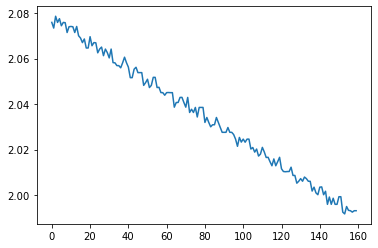

In [239]:
import matplotlib.pyplot as plt

plt.plot((list(range(len(loss)))), loss)
plt.show()

In [202]:
print(inputs[1])

_, output = forward_prop(inputs[5])

print(output)


[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[0.03848688 0.0380337  0.03865505 0.03776647 0.03792619 0.03814075
 0.03834032 0.96156676]
